In [74]:

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler


import matplotlib.pyplot as plt
import seaborn as sns


from pandas.plotting import scatter_matrix
import missingno as msno  


from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor





In [75]:
data = pd.read_csv("supermarket_sales.csv")


In [76]:
print(data.head())



    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0   1/27/2019  13:08      Ewallet  522.83                 4.761905   
1  03-08-2019  10:29         Cash   76.40                 4.761905   
2  03-03-2019  13:23

In [77]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [78]:

print(data.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

In [79]:

print("Shape of the dataset:", data.shape)


Shape of the dataset: (1000, 17)


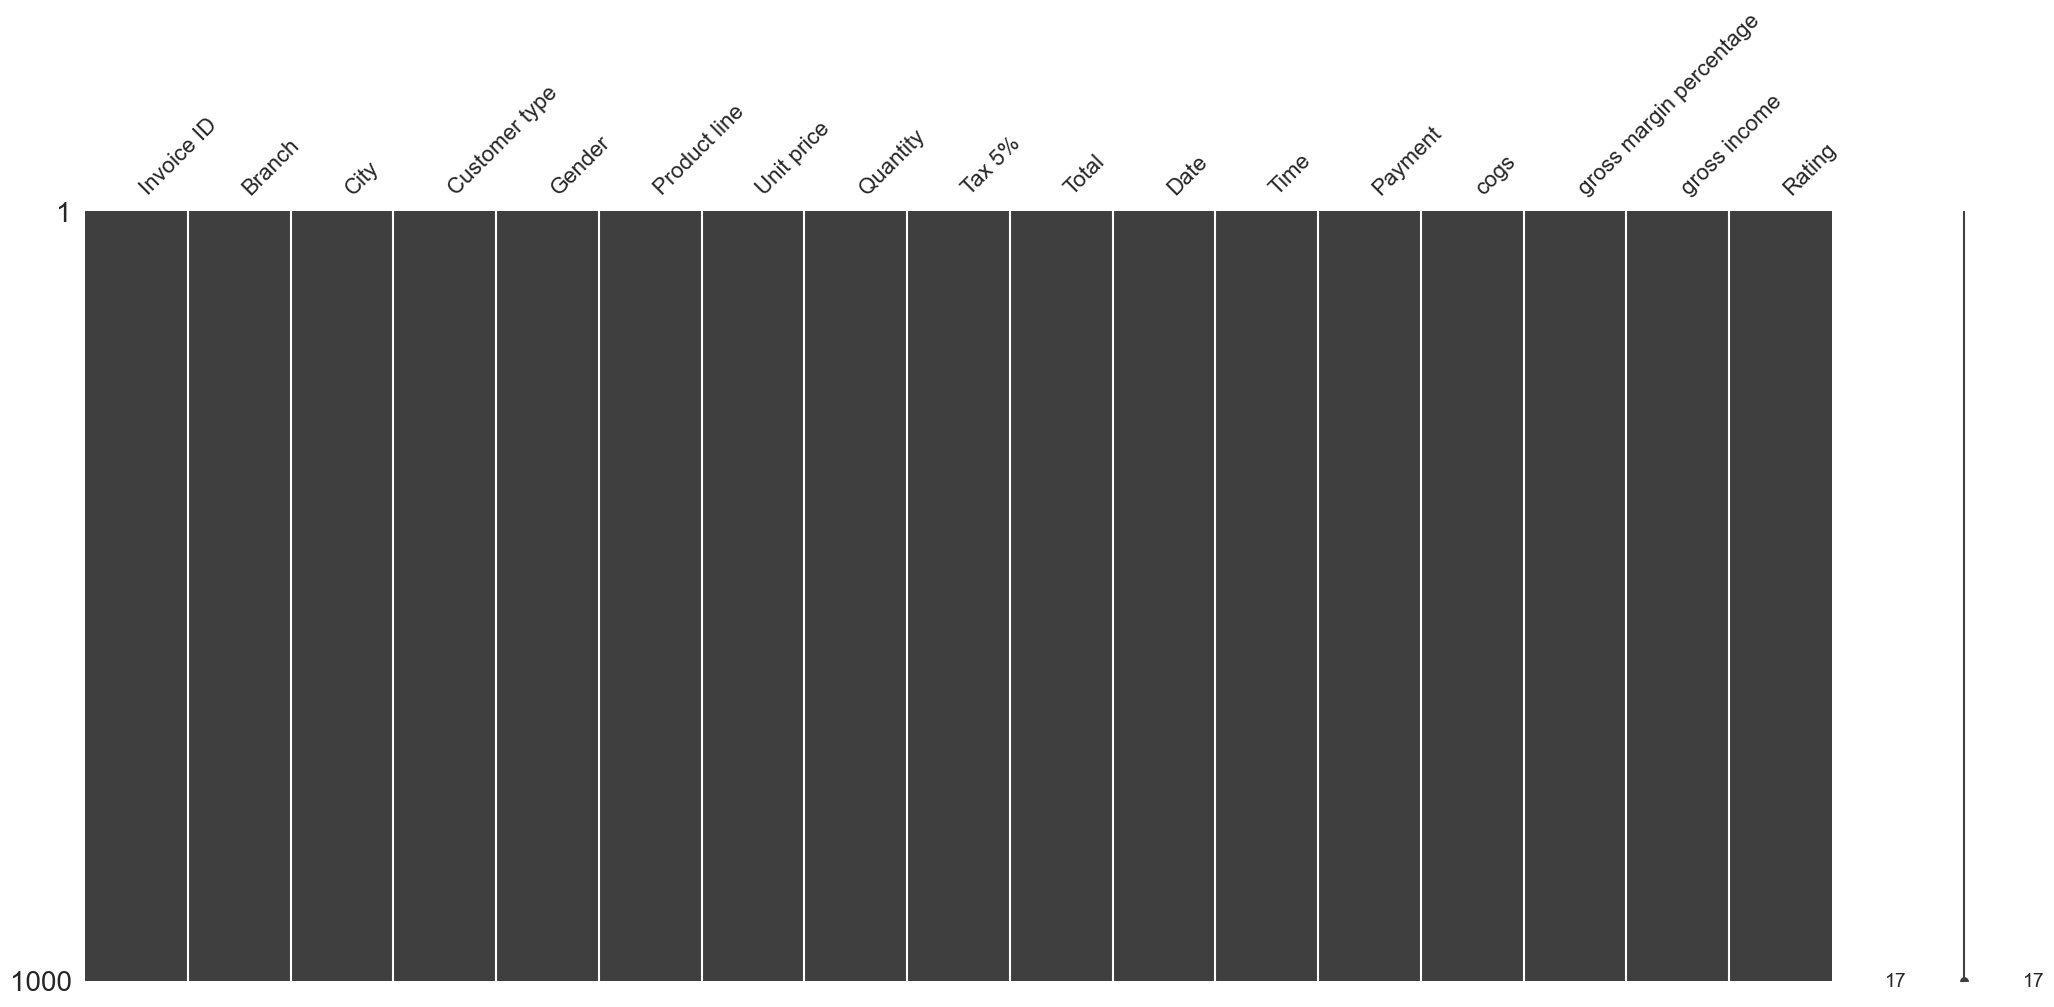

In [80]:

msno.matrix(data)
plt.show()


In [81]:

print("\nNumber of duplicate rows:", data.duplicated().sum())
data = data.drop_duplicates()



Number of duplicate rows: 0


In [82]:
# Identify categorical columns and print them
categorical_columns = data.select_dtypes(include=[object]).columns
print("Categorical columns identified:", categorical_columns)


Categorical columns identified: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')


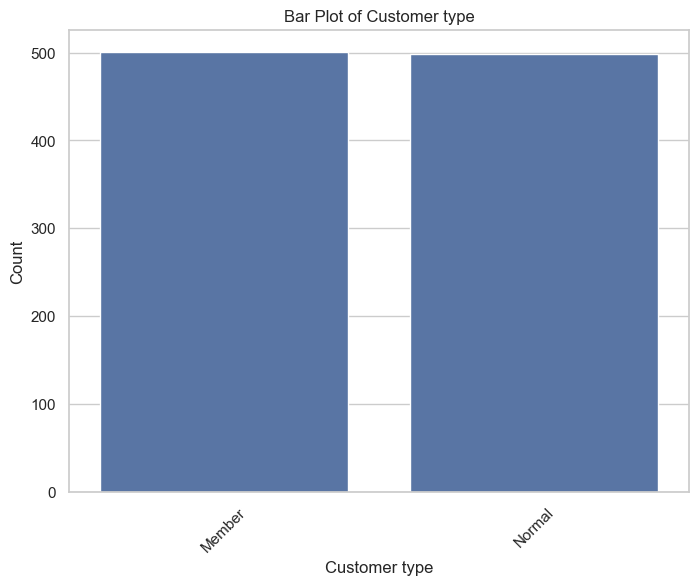

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer type', data=data)
plt.title('Bar Plot of Customer type')
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

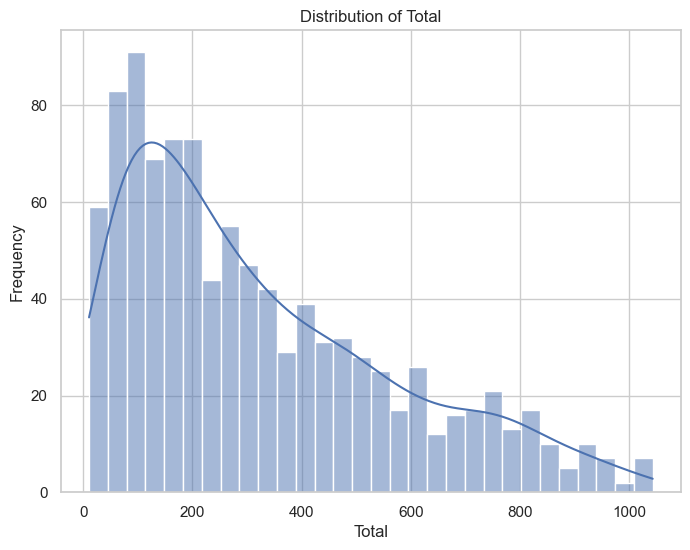

In [84]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Total'], kde=True, bins=30)
plt.title('Distribution of Total')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()

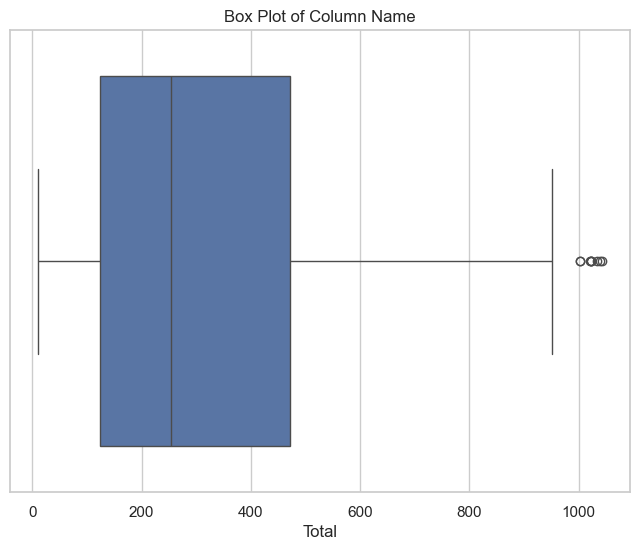

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Total'])
plt.title('Box Plot of Column Name')
plt.show()

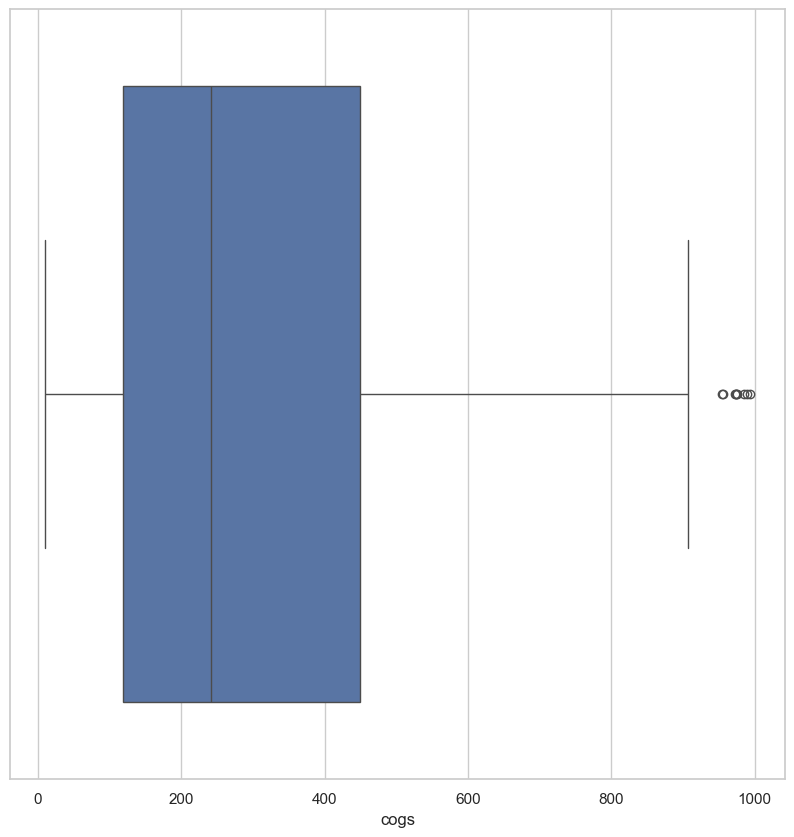

In [86]:
data.columns
plt.figure(figsize=(10,10))
sns.boxplot(x=data["cogs"])
plt.show()

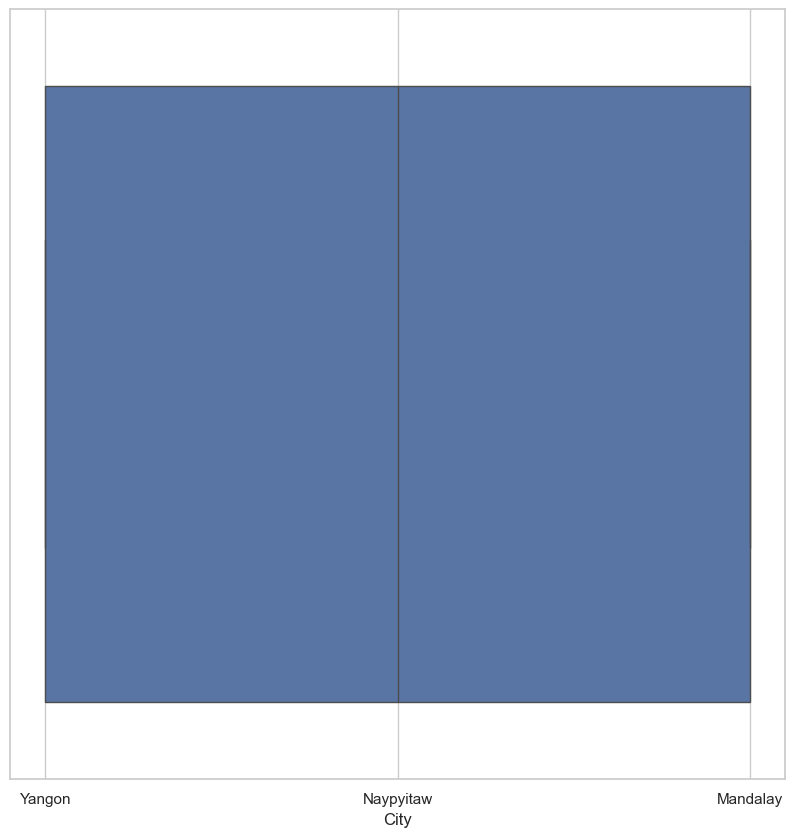

In [87]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data["City"])
plt.show()

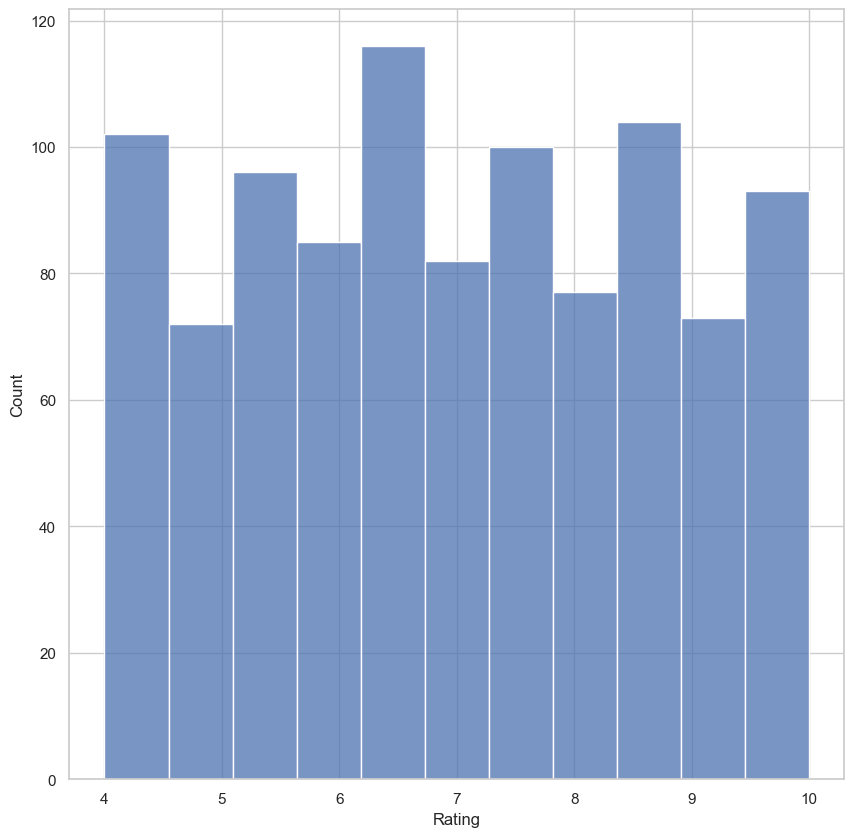

In [88]:
plt.figure(figsize=(10,10))
sns.histplot(x=data["Rating"])
plt.show()

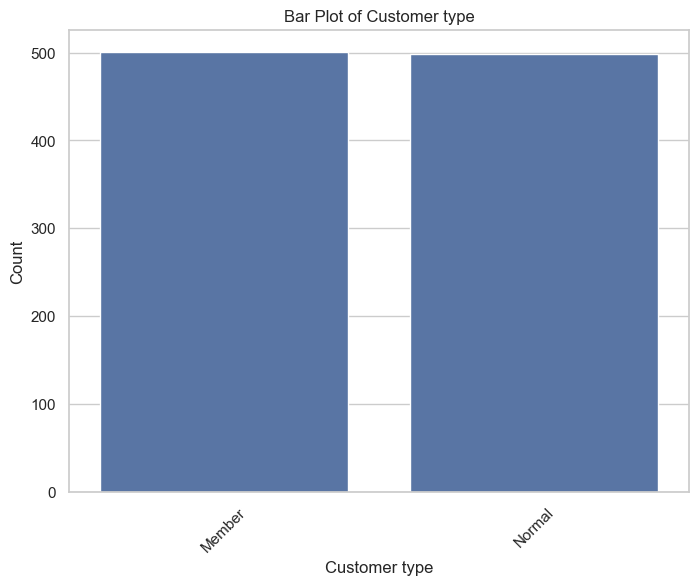

In [89]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer type', data=data)
plt.title('Bar Plot of Customer type')
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\sri kathir\AppData\Local\Temp\ipykernel_29788\1665322309.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='Product line', ax=axes[0], palette="viridis")
C:\Users\sri kathir\AppData\Local\Temp\ipykernel_29788\1665322309.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='Branch', ax=axes[1], palette="coolwarm")
C:\Users\sri kathir\AppData\Local\Temp\ipykernel_29788\1665322309.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x='City', ax=axes[2], palette="muted")


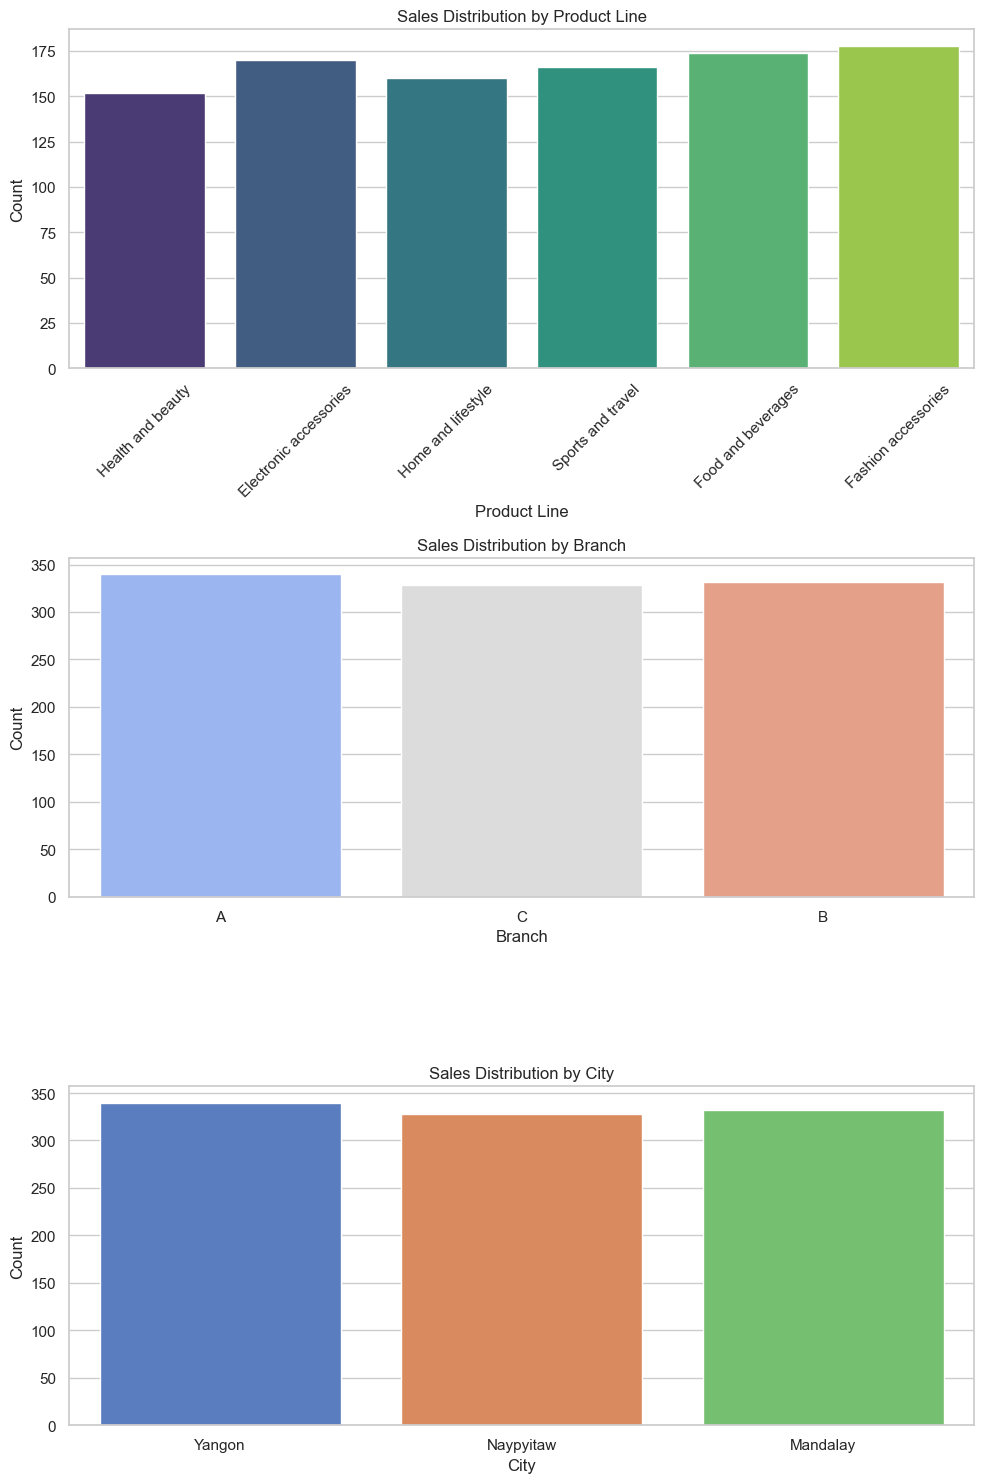

In [90]:


sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.countplot(data, x='Product line', ax=axes[0], palette="viridis")
axes[0].set_title('Sales Distribution by Product Line')
axes[0].set_xlabel('Product Line')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data, x='Branch', ax=axes[1], palette="coolwarm")
axes[1].set_title('Sales Distribution by Branch')
axes[1].set_xlabel('Branch')
axes[1].set_ylabel('Count')

sns.countplot(data, x='City', ax=axes[2], palette="muted")
axes[2].set_title('Sales Distribution by City')
axes[2].set_xlabel('City')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [91]:
from sklearn.preprocessing import LabelEncoder

# Encode only if there are categorical columns
if len(categorical_columns) > 0:
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        try:
            data[column] = label_encoder.fit_transform(data[column])
        except Exception as e:
            print(f"Error encoding {column}: {e}")
else:
    print("No categorical columns to encode.")


In [92]:
numerical_columns = data.select_dtypes(include=[np.number]).columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


print("\nData after cleansing:")
print(data.head())



Data after cleansing:
   Invoice ID    Branch      City  Customer type    Gender  Product line  \
0    1.089461 -1.208970  1.210174      -0.998002 -0.998002      0.319617   
1   -1.238417  1.238338 -0.009759       1.002002 -0.998002     -1.430109   
2    0.531740 -1.208970  1.210174       1.002002  1.002002      0.902859   
3   -1.667966 -1.208970  1.210174      -0.998002  1.002002      0.319617   
4   -0.555989 -1.208970  1.210174       1.002002  1.002002      1.486101   

   Unit price  Quantity    Tax 5%     Total      Date      Time   Payment  \
0    0.718160  0.509930  0.919607  0.919607  0.259307 -0.715515  1.203528   
1   -1.525303 -0.174540 -0.987730 -0.987730 -0.503952 -1.552288 -1.205937   
2   -0.352781  0.509930  0.071446  0.071446 -0.704809 -0.654288 -0.001205   
3    0.096214  0.852165  0.675780  0.675780  0.259307  1.590711  1.203528   
4    1.156959  0.509930  1.267125  1.267125 -0.986010 -1.511470  1.203528   

       cogs  gross margin percentage  gross income    Rat

In [93]:
scaler=MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [94]:
print(data.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


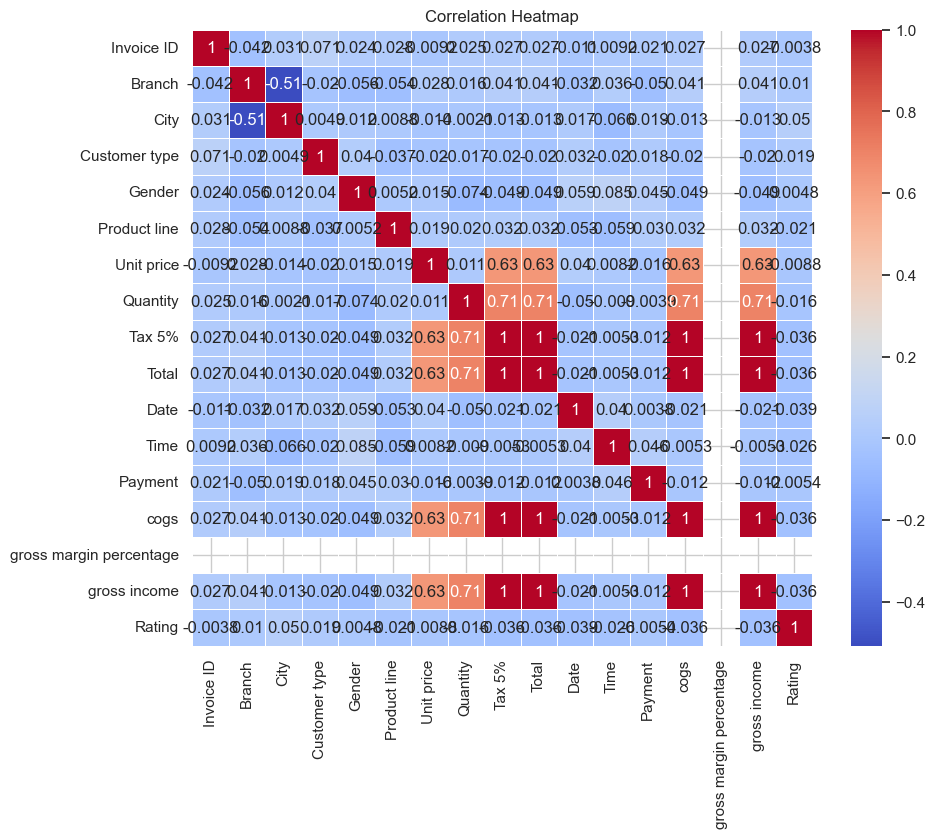

In [95]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [96]:

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score


label_encoder = LabelEncoder()
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


X = data[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 
                'Quantity', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']]
y = data['Total']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [97]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

grbpredict=gbr.predict(X_test)

mse_gbr=mean_squared_error(y_test,grbpredict)
r2scoregbr=r2_score(y_test,grbpredict)
# print("Classification Report is:\n",classification_report(grbpredict,y_test))
# print("Confusion Matrix:\n",confusion_matrix(y_test,grbpredict))

print(f" GradientBoostingRegressor MSE: {mse_gbr}, R2: {r2scoregbr}")
accuray_gbr=r2scoregbr*100
print(f"GradientBoostingRegressor accuracy : {accuray_gbr}")


 GradientBoostingRegressor MSE: 6.776621020205967e-05, R2: 0.9999379234618143
GradientBoostingRegressor accuracy : 99.99379234618144


In [98]:
# dtr=DecisionTreeRegressor()
# dtr.fit(X_train,y_train)

# destreepred=dtr.predict(X_test)
# mse_dtr=mean_squared_error(y_test,destreepred)
# result_dtr=r2_score(y_test,destreepred)

# print(f" DecisionTreeRegressor MSE: {mse_dtr}, R2: {result_dtr}")
# accuray_dtr=result_dtr*100
# print(f"lDecisionTreeRegressor accuracy : {accuray_dtr}")
# conf_matrix = confusion_matrix(y_test, destreepred)
# print("Confusion Matrix:")
# print(conf_matrix)



In [99]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

mselinerregression = mean_squared_error(y_test, y_pred_lr)
r2linearreg = r2_score(y_test, y_pred_lr)


print(f"Linear Regression MSE: {mselinerregression}, R2: {r2linearreg}")
accuraylr=r2linearreg*100
print(f"linear regresssion accuracy : {accuraylr}")


Linear Regression MSE: 8.960919923428761e-32, R2: 1.0
linear regresssion accuracy : 100.0


In [100]:
X_test.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating'],
      dtype='object')

In [101]:

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)


y_pred_rf = rf_reg.predict(X_test)

# Evaluation for Random Forest
mse_rfr = mean_squared_error(y_test, y_pred_rf)
r2_rfr = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rfr}, R2: {r2_rfr}")
accuracy_rfr =r2_rfr*100
print(f"accuracy is : {accuracy_rfr}")

Random Forest MSE: 7.292611487077716e-05, R2: 0.9999331967843412
accuracy is : 99.99331967843412


In [102]:
# import pandas as pd

# # Predefined column names
# default_column_names = [
#     'Branch', 'City', 'Customer type', 'Gender', 'Product line', 
#     'Unit price', 'Quantity', 'Payment', 'cogs', 
#     'gross margin percentage', 'gross income', 'Rating'
# ]

# # Function to get column names from user input
# def get_column_names(default_columns):
#     print("The default column names are:")
#     print(", ".join(default_columns))
#     print("You can modify these names or press Enter to keep them.")
    
#     column_names = []
#     for default in default_columns:
#         user_input = input(f"Column name (default: '{default}'): ")
#         column_names.append(user_input if user_input else default)
    
#     return column_names

# # Get column names from the user
# user_column_names = get_column_names(default_column_names)

# # Create a DataFrame with the specified column names
# df = pd.DataFrame(columns=user_column_names)

# # Display the DataFrame's columns
# print("\nThe DataFrame columns are:")
# print(df.columns)


In [2]:
# Required imports
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv("supermarket_sales.csv")

# Select the relevant columns
features = [
    'Branch', 'City', 'Customer type', 'Gender', 'Product line', 
    'Unit price', 'Quantity', 'Payment', 'cogs', 
    'gross margin percentage', 'gross income', 'Rating'
]
X = data[features]
y = data['Total']

# Identify categorical and numerical features
categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
numerical_features = ['Unit price', 'Quantity', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Function to get user input and predict the total
def predict_total():
    # Get user input for categorical features
    branch = input("Enter Branch (A, B, C): ")
    city = input("Enter City (Yangon, Naypyitaw, Mandalay): ")
    customer_type = input("Enter Customer Type (Member, Normal): ")
    gender = input("Enter Gender (Male, Female): ")
    product_line = input("Enter Product Line (Health and beauty, Electronic accessories, etc.): ")
    payment = input("Enter Payment Method (Cash, Credit card, Ewallet): ")
    
    # Get user input for numerical features
    unit_price = float(input("Enter the Unit Price: "))
    quantity = int(input("Enter the Quantity: "))
    cogs = float(input("Enter COGS: "))
    gross_margin_percentage = float(input("Enter Gross Margin Percentage: "))
    gross_income = float(input("Enter Gross Income: "))
    rating = float(input("Enter Rating: "))
    
    # Create a dataframe for the input
    user_input_df = pd.DataFrame({
        'Branch': [branch],
        'City': [city],
        'Customer type': [customer_type],
        'Gender': [gender],
        'Product line': [product_line],
        'Unit price': [unit_price],
        'Quantity': [quantity],
        'Payment': [payment],
        'cogs': [cogs],
        'gross margin percentage': [gross_margin_percentage],
        'gross income': [gross_income],
        'Rating': [rating]
    })
    
    # Make prediction
    predicted_total = pipeline.predict(user_input_df)
    print(f"Predicted Total: {predicted_total[0]:.2f}")

# Call the prediction function
predict_total()


Predicted Total: 13262.55


In [43]:
# # Required imports for date parsing and time series analysis
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from datetime import datetime

# # Load the dataset
# data = pd.read_csv("supermarket_sales.csv")

# # Convert 'Date' column to datetime format with the correct format
# data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# # Create new features from the 'Date' column
# data['Day'] = data['Date'].dt.day
# data['Month'] = data['Date'].dt.month
# data['DayOfWeek'] = data['Date'].dt.dayofweek  # 0=Monday, 6=Sunday

# # Use relevant features, now including 'Day', 'Month', and 'DayOfWeek'
# features = [
#     'Branch', 'City', 'Customer type', 'Gender', 'Product line', 
#     'Unit price', 'Quantity', 'Payment', 'cogs', 
#     'gross margin percentage', 'gross income', 'Rating',
#     'Day', 'Month', 'DayOfWeek'  # Time-related features
# ]
# X = data[features]
# y = data['Date'].map(datetime.toordinal)  # Convert 'Date' to numerical format for prediction

# # Identify categorical and numerical features
# categorical_features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
# numerical_features = ['Unit price', 'Quantity', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Day', 'Month', 'DayOfWeek']

# # Preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(), categorical_features)
#     ])

# # Define the pipeline with preprocessing and a regression model
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', RandomForestRegressor())
# ])

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# pipeline.fit(X_train, y_train)

# # Function to get user input and predict the selling date
# def predict_selling_date():
#     # Get user input for categorical features
#     branch = input("Enter Branch (A, B, C): ")
#     city = input("Enter City (Yangon, Naypyitaw, Mandalay): ")
#     customer_type = input("Enter Customer Type (Member, Normal): ")
#     gender = input("Enter Gender (Male, Female): ")
#     product_line = input("Enter Product Line (Health and beauty, Electronic accessories, etc.): ")
#     payment = input("Enter Payment Method (Cash, Credit card, Ewallet): ")
    
#     # Get user input for numerical features
#     unit_price = float(input("Enter the Unit Price: "))
#     quantity = int(input("Enter the Quantity: "))
#     cogs = float(input("Enter COGS: "))
#     gross_margin_percentage = float(input("Enter Gross Margin Percentage: "))
#     gross_income = float(input("Enter Gross Income: "))
#     rating = float(input("Enter Rating: "))
    
#     # Get additional time-based features
#     day = int(input("Enter the Day: "))
#     month = int(input("Enter the Month: "))
#     day_of_week = int(input("Enter the Day of the Week (0=Monday, 6=Sunday): "))
    
#     # Create a dataframe for the input
#     user_input_df = pd.DataFrame({
#         'Branch': [branch],
#         'City': [city],
#         'Customer type': [customer_type],
#         'Gender': [gender],
#         'Product line': [product_line],
#         'Unit price': [unit_price],
#         'Quantity': [quantity],
#         'Payment': [payment],
#         'cogs': [cogs],
#         'gross margin percentage': [gross_margin_percentage],
#         'gross income': [gross_income],
#         'Rating': [rating],
#         'Day': [day],
#         'Month': [month],
#         'DayOfWeek': [day_of_week]
#     })
    
#     # Make prediction
#     predicted_date_ordinal = pipeline.predict(user_input_df)
#     predicted_date = datetime.fromordinal(int(predicted_date_ordinal[0]))
    
#     # Print the predicted selling date in the '%m/%d/%Y' format
#     print(f"Predicted Selling Date: {predicted_date.strftime('%m/%d/%Y')}")

# # Call the prediction function
# predict_selling_date()


ValueError: time data "03-08-2019" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.